In [195]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [197]:
# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv')  # Asegúrate de que el archivo CSV esté en el mismo directorio o proporciona la ruta correcta

In [199]:
# Visualizar las primeras filas del dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


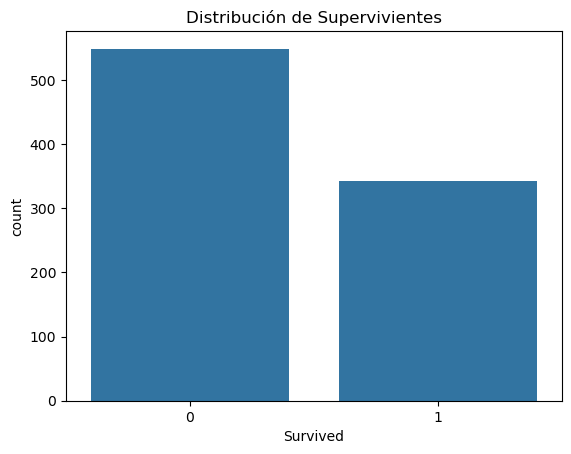

In [201]:
# Visualizar la distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivientes')
plt.show()

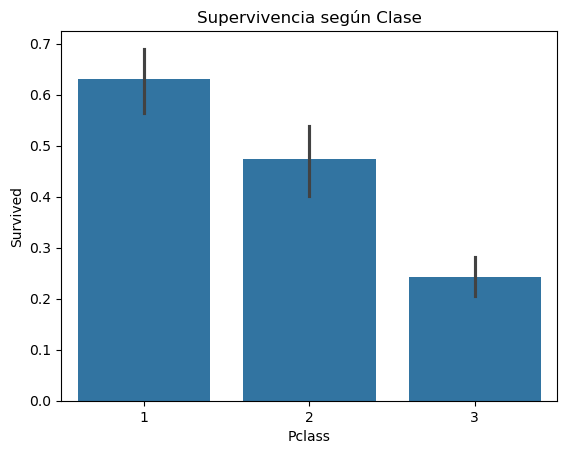

In [203]:
# Analizar la relación entre Pclass y Survived
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Supervivencia según Clase')
plt.show()

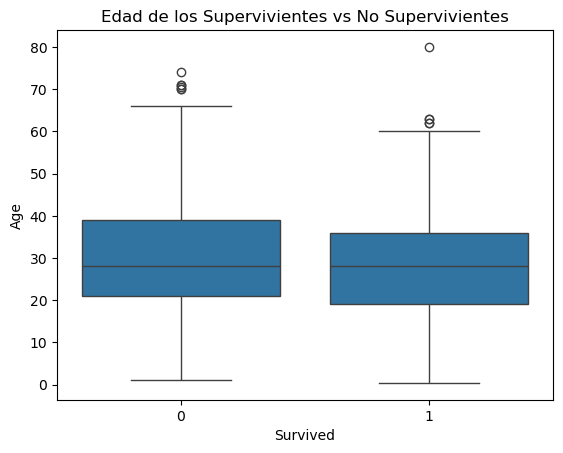

In [204]:
# Diagrama de caja para Age vs Survived
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Edad de los Supervivientes vs No Supervivientes')
plt.show()

In [207]:
# Manejo de valores faltantes sin usar inplace=True
data['Age'] = data['Age'].fillna(data['Age'].median())  # Rellenar valores faltantes en 'Age' con la mediana
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # Rellenar valores faltantes en 'Embarked' con la moda
data['Fare'] = data['Fare'].fillna(data['Fare'].median())  # Rellenar valores faltantes en 'Fare' con la mediana

In [209]:
# Conversión de variables categóricas a numéricas
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [211]:
# Verificar si hay valores NaN en el dataset
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
dtype: int64


In [213]:
# Seleccionar características relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[features]
y = data['Survived']

In [215]:
# División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
# Entrenamiento del modelo utilizando Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [219]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [221]:
# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [223]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

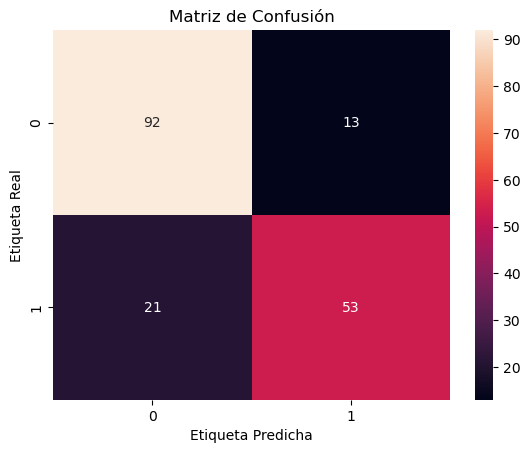

In [225]:
# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()